In [ ]:
import pandas as pd
import numpy as np

# Sample data (you can load your actual data here)
data = pd.read_csv('preprocessed_dataset.csv')

# Check the original columns
print("Original Columns: ", data.columns)

# Drop rows with 'Uncategorized' values in critical columns
data = data[(data['Meditation and Exercises'] != 'Uncategorized') & (data['Relationship status'] != 'Uncategorized')]

# Replace 'Uncategorized' with NaN for numerical imputation
data.replace('Uncategorized', np.nan, inplace=True)

# Handle missing values (simple example: drop rows with missing values)
data.dropna(inplace=True)

# Check columns again
print("Columns after preprocessing: ", data.columns)

# Separate features and target variable
X = data.drop('Depression State', axis=1)
y = data['Depression State']

# Encode categorical variables for features only
X_encoded = pd.get_dummies(X, drop_first=True)

# Check the columns after encoding
print("Columns after encoding: ", X_encoded.columns)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check the preprocessed data
print(X_train.head())
print(y_train.head())


Original Columns:  Index(['Gender', 'Age group', 'Marital status', 'Occupation', 'State',
       'Meditation and Exercises', 'Sleeping time', 'Family Relations',
       'Relationship status', 'Concentration', 'ever felt depressed',
       'taking any treatment?', 'Phys_health_interview', 'Suicidal attempt?',
       'Panic attacks?', 'Hopelessness', 'Depression State',
       'Social_Weakness'],
      dtype='object')
Columns after preprocessing:  Index(['Gender', 'Age group', 'Marital status', 'Occupation', 'State',
       'Meditation and Exercises', 'Sleeping time', 'Family Relations',
       'Relationship status', 'Concentration', 'ever felt depressed',
       'taking any treatment?', 'Phys_health_interview', 'Suicidal attempt?',
       'Panic attacks?', 'Hopelessness', 'Depression State',
       'Social_Weakness'],
      dtype='object')
Columns after encoding:  Index(['Gender_Male', 'Age group_15-24', 'Age group_25-34', 'Age group_45-59',
       'Age group_60+', 'Age group_Others', '

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.92
Classification Report:
                        precision    recall  f1-score   support

                  Mild       0.27      0.35      0.31        17
              Moderate       0.29      0.20      0.24        20
         No depression       0.50      0.50      0.50        28
                Severe       0.48      0.50      0.49        20
prefer not to disclose       1.00      1.00      1.00       561

              accuracy                           0.92       646
             macro avg       0.51      0.51      0.51       646
          weighted avg       0.92      0.92      0.92       646



In [ ]:
import matplotlib.pyplot as plt

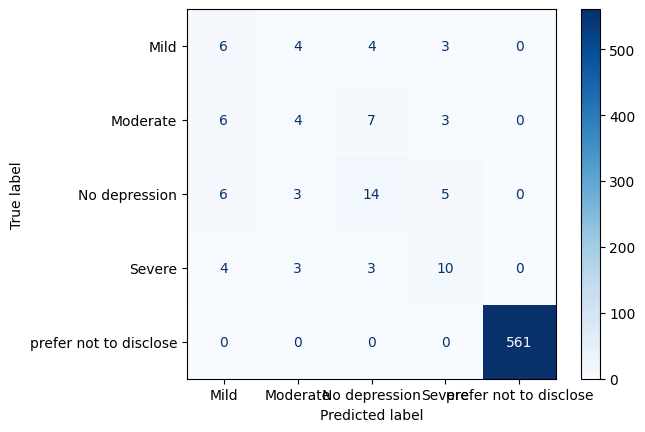

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Create an imbalanced pipeline
pipeline = ImbPipeline([
    ('smote', smote),
    ('model', RandomForestClassifier(random_state=42))
])

# Train the model with SMOTE
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_smote = pipeline.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
report_smote = classification_report(y_test, y_pred_smote, target_names=label_encoder.classes_)

print(f"Accuracy with SMOTE: {accuracy_smote:.2f}")
print("Classification Report with SMOTE:")
print(report_smote)


Accuracy with SMOTE: 1.00
Classification Report with SMOTE:
                        precision    recall  f1-score   support

                  Mild       0.63      0.65      0.64        34
              Moderate       0.70      0.73      0.72        26
         No depression       0.67      0.63      0.65        52
                Severe       0.64      0.67      0.65        24
prefer not to disclose       1.00      1.00      1.00     47395

              accuracy                           1.00     47531
             macro avg       0.73      0.74      0.73     47531
          weighted avg       1.00      1.00      1.00     47531



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


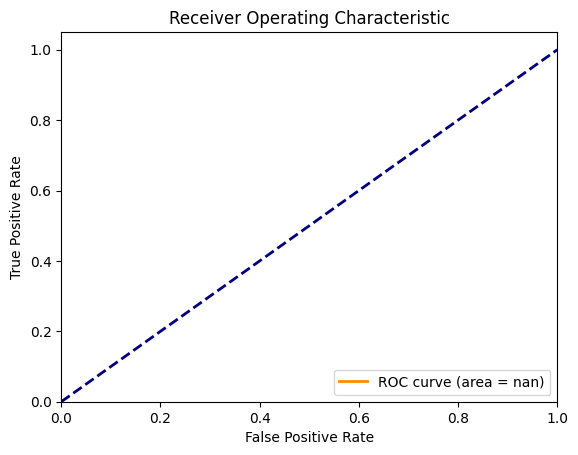

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label='your_positive_class')
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Check data types
print(X.dtypes)

# Convert categorical variables to numeric if not done yet
from sklearn.preprocessing import LabelEncoder

# Example for converting categorical columns
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le


Gender                      object
Age group                   object
Marital status              object
Occupation                  object
State                       object
Meditation and Exercises    object
Sleeping time               object
Family Relations            object
Relationship status         object
Concentration               object
ever felt depressed         object
taking any treatment?       object
Phys_health_interview       object
Suicidal attempt?           object
Panic attacks?              object
Hopelessness                object
Social_Weakness             object
dtype: object


In [ ]:
# Check for missing values
print(X.isnull().sum())


Gender                      0
Age group                   0
Marital status              0
Occupation                  0
State                       0
Meditation and Exercises    0
Sleeping time               0
Family Relations            0
Relationship status         0
Concentration               0
ever felt depressed         0
taking any treatment?       0
Phys_health_interview       0
Suicidal attempt?           0
Panic attacks?              0
Hopelessness                0
Social_Weakness             0
dtype: int64


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy scores: {scores}")


Cross-validated accuracy scores: [0.93962848 0.93653251 0.9255814  0.92403101 0.9255814 ]


In [ ]:
# Example: RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# Perform cross-validation again
scores = cross_val_score(model, X_encoded, y, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy scores: {scores}")

Cross-validated accuracy scores: [0.94891641 0.93653251 0.92868217 0.93178295 0.93023256]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit the model on the training set
model.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy = model.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy}")

# Generate a classification report on the test set
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Test set accuracy: 0.9272445820433437
                        precision    recall  f1-score   support

                  Mild       0.32      0.35      0.33        17
              Moderate       0.36      0.25      0.29        20
         No depression       0.50      0.61      0.55        28
                Severe       0.56      0.50      0.53        20
prefer not to disclose       1.00      1.00      1.00       561

              accuracy                           0.93       646
             macro avg       0.55      0.54      0.54       646
          weighted avg       0.93      0.93      0.93       646



In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9210526315789473
Classification Report:
                         precision    recall  f1-score   support

                  Mild       0.27      0.35      0.31        17
              Moderate       0.27      0.20      0.23        20
         No depression       0.48      0.50      0.49        28
                Severe       0.53      0.50      0.51        20
prefer not to disclose       1.00      1.00      1.00       561

              accuracy                           0.92       646
             macro avg       0.51      0.51      0.51       646
          weighted avg       0.92      0.92      0.92       646

Confusion Matrix:
 [[  6   4   6   1   0]
 [  6   4   5   5   0]
 [  8   3  14   3   0]
 [  2   4   4  10   0]
 [  0   0   0   0 561]]


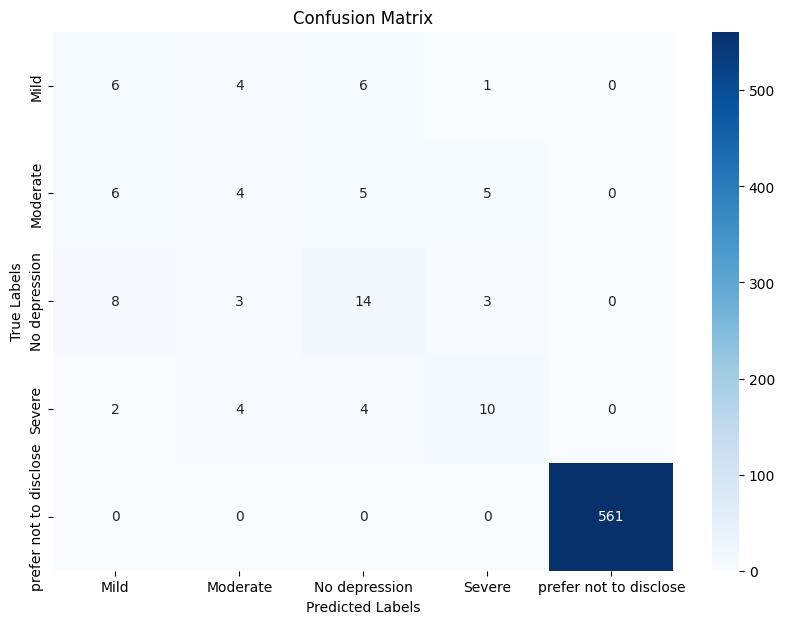

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


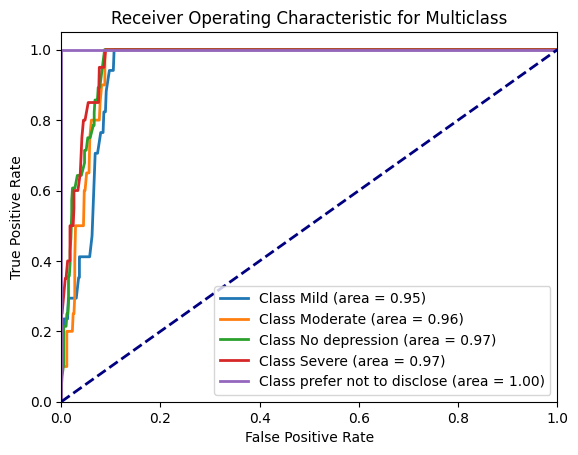

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_prob = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {model.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()


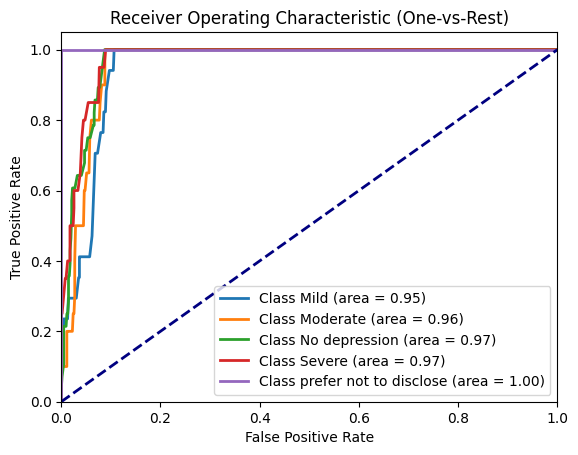

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each class
for i in range(len(model.classes_)):
    y_test_bin = (y_test == model.classes_[i]).astype(int)
    y_prob = model.predict_proba(X_test)[:, i]

    fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'Class {model.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()


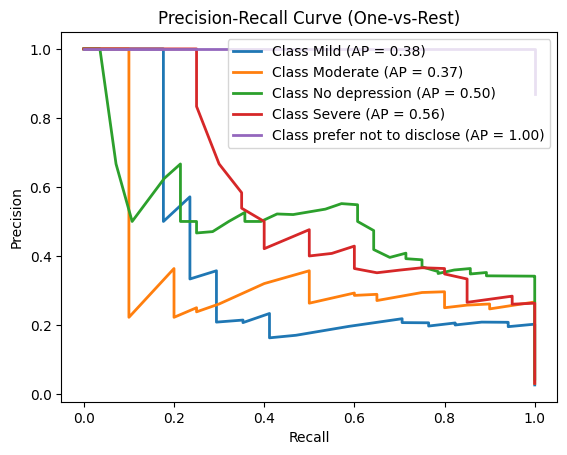

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Compute Precision-Recall curve and AUC for each class
for i in range(len(model.classes_)):
    y_test_bin = (y_test == model.classes_[i]).astype(int)
    y_prob = model.predict_proba(X_test)[:, i]

    precision, recall, _ = precision_recall_curve(y_test_bin, y_prob)
    avg_precision = average_precision_score(y_test_bin, y_prob)

    plt.plot(recall, precision, lw=2, label=f'Class {model.classes_[i]} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.legend(loc="best")
plt.show()


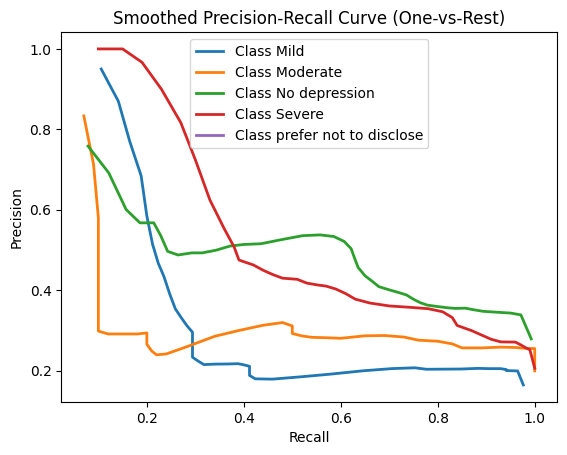

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Compute Precision-Recall curve for each class
for i in range(len(model.classes_)):
    y_test_bin = (y_test == model.classes_[i]).astype(int)
    y_prob = model.predict_proba(X_test)[:, i]

    precision, recall, _ = precision_recall_curve(y_test_bin, y_prob)

    # Smooth the curve
    smooth_precision = np.convolve(precision, np.ones(5)/5, mode='valid')
    smooth_recall = np.convolve(recall, np.ones(5)/5, mode='valid')

    plt.plot(smooth_recall, smooth_precision, lw=2, label=f'Class {model.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Smoothed Precision-Recall Curve (One-vs-Rest)')
plt.legend(loc="best")
plt.show()
